# S02 T05: Exploració de les dades

Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas.

https://www.milantomin.com/2018-u-s-airlines-delay-analysis/

# - Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

In [25]:
# Cargo el fichero

df = pd.read_csv (r"C:\Users\jmmat\Documents\03.- Data Science IT Academy\Airlines Delay\DelayedFlights.csv")
df.head(1)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [26]:
# Obtengo informacion del fichero
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [27]:
# Creo una lista con el nombre de las columnas.

columnasInteresantes= df.columns
print(columnasInteresantes)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [28]:
# Elimino las columnas que no necesito ahora
borrarColumnas = ['CancellationCode', 'Diverted', 'CarrierDelay',
                  'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TaxiIn', 'TaxiOut',
                  'Unnamed: 0', 'DayofMonth', 'TailNum']

df1 = df.drop(borrarColumnas, axis=1)

In [29]:
df.shape

(1936758, 30)

In [30]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [31]:
# Hago listado de las compañías.

dfUniqueCarrier = df.UniqueCarrier.unique()
dfUniqueCarrier

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

# Resumeix estadísticament les columnes d’interès

In [32]:
# Saco los valores estadisticos más importantes

print('Saco los valores estadisticos más importantes, de las variables numericas')
df.describe()

Saco los valores estadisticos más importantes, de las variables numericas


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


# Troba quantes dades faltants hi ha per columna

In [33]:
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

ArrTime                7110
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
TaxiIn                 7110
TaxiOut                 455
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


# Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [34]:
# Calcul de velocitar mitjana de vol
df['VelocitatMitja'] = df['Distance']/df['AirTime']
# df['retraso']

print('primeros 5 registros de velocidad')
df[['VelocitatMitja', 'Distance', 'AirTime']].head()

primeros 5 registros de velocidad


,VelocitatMitja,Distance,AirTime
0,6.982759,810,116.0
1,7.168142,810,113.0
2,6.776316,515,76.0
3,6.688312,515,77.0
4,7.908046,688,87.0


# Taula de les aerolínies amb més endarreriments acumulats

In [35]:
dfUniqueCarrier = df.UniqueCarrier

print('\nRelación de compañías aéreas')
dfUniqueCarrier


Relación de compañías aéreas


0          WN
1          WN
2          WN
3          WN
4          WN
           ..
1936753    DL
1936754    DL
1936755    DL
1936756    DL
1936757    DL
Name: UniqueCarrier, Length: 1936758, dtype: object

# Quins són els vols més llargs? I els més endarrerits?

In [54]:
#Elimino las columnas que no necesito ahora

borrarColumnas = ['CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','CRSArrTime', 'UniqueCarrier', 'FlightNum','TaxiIn', 'TaxiOut',
                  'Unnamed: 0', 'DayofMonth', 'TailNum']

df1 = df.drop(borrarColumnas, axis=1)

#ordeno por retraso
df1=df1.sort_values(by = 'ArrDelay', ascending= False, ignore_index=True)
df1['ArrDelay']

retrasoLagos = df1.head(10)
print('\nListado de los 10 vuelos con más retraso, su origen y destino')
retrasoLagos[['ArrDelay','Origin', 'Dest' ]]


Listado de los 10 vuelos con más retraso, su origen y destino


,ArrDelay,Origin,Dest
0,2461.0,HNL,MSP
1,2453.0,CLT,MSP
2,1951.0,RSW,DTW
3,1707.0,LIT,DFW
4,1655.0,BOS,MSP
5,1583.0,OMA,MSP
6,1542.0,MOT,MSP
7,1525.0,EGE,MIA
8,1510.0,SEA,MSP
9,1490.0,BNA,MEM


In [56]:
#Odeno por distacia
df1=df1.sort_values(by = 'Distance', ascending= False, ignore_index=True)
df1['Distance']

retrasoLagos = df1.head(10)
print('\nListado de los 10 vuelos más lasrgos en distancia, con su origen y destino')
retrasoLagos[['Distance','Origin', 'Dest' ]]


Listado de los 10 vuelos más lasrgos en distancia, con su origen y destino


,Distance,Origin,Dest
0,4962,EWR,HNL
1,4962,HNL,EWR
2,4962,EWR,HNL
3,4962,EWR,HNL
4,4962,EWR,HNL
5,4962,EWR,HNL
6,4962,EWR,HNL
7,4962,EWR,HNL
8,4962,HNL,EWR
9,4962,EWR,HNL


# Dibujo la cantidad de vuelos que ha hecho cada compañía en el 2008

In [36]:
# Cuento las compañias que hay y la frecuencai con que se repite:

numero = df.groupby(df['UniqueCarrier']).count()

# Me quedo solo con la columna que necesito
borrarColumnas = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
                  'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum',
                  'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
                  'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
                  'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
                  'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                  'VelocitatMitja']

df2 = numero.drop(borrarColumnas, axis=1)

df2 = df2.rename(columns={'Unnamed: 0': 'cantidadVuelos'})


print('Cantidad de vuelos realizados por cada compañía')
print(df2)

Cantidad de vuelos realizados por cada compañía
               cantidadVuelos
UniqueCarrier                
9E                      51885
AA                     191865
AQ                        750
AS                      39293
B6                      55315
CO                     100195
DL                     114238
EV                      81877
F9                      28269
FL                      71284
HA                       7490
MQ                     141920
NW                      79108
OH                      52657
OO                     132433
UA                     141426
US                      98425
WN                     377602
XE                     103663
YV                      67063


In [45]:
# Convierto el indice en una columna del df2

df2 = df2.reset_index()
df2.columns

Index(['UniqueCarrier', 'cantidadVuelos'], dtype='object')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='cantidadVuelos'>

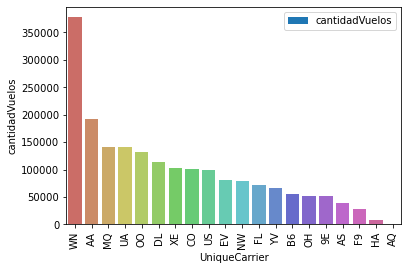

In [52]:
# ordeno y creo un grafico de barras.

df2 = df2.sort_values(by='cantidadVuelos', ascending=False)
df2['cantidadVuelos'] 

df2.plot(kind='bar')

sns.barplot(x = "UniqueCarrier", y = "cantidadVuelos", palette="hls", data = df2)


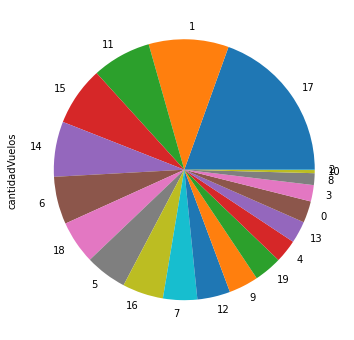

In [50]:
plot = df2['cantidadVuelos'].plot.pie(subplots=True, figsize=(11, 6))

# Investigo cuantos años hay en el df

In [ ]:
dfAnyos= df.groupby(df['Year']).count()
dfAnyos

Veo que solo hay un año, el 2008, con 1.936.758 vuelos

# Guardar a EXCEL¶

In [59]:
# Guardar excel

df2.to_excel(r"D:\Documentos D\GitHub\0204_programaci-_Num-rica\VDatos_0205.xlsx")
print()
print('Guardado fichero : Vueling_Python.xlsx')
print()


Guardado fichero : Vueling_Python.xlsx

